## Ejercicio regresión logística

In [1]:
#Cargamos las librerías

import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
#Cargamos el Dataset y mostramos los primeros 5 datos de todo el conjunto

data = pd.read_csv("C:/datos/framingham.csv")

data.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
#Con base en lo anterior seleccionaremos como variables de interes las siguientes: diabetes y glucose

#Ponemos en una tabla las variables que vamos a trabajar

data[['glucose','diabetes']].head()

,glucose,diabetes
0,77.0,0
1,76.0,0
2,70.0,0
3,103.0,0
4,85.0,0


In [4]:
# Creamos un modelo de regresión logística

regresion = LogisticRegression()

# Ajustamos el modelo a los datos

x = data[['glucose']]  
y = data['diabetes']  

# Eliminamos las filas que les falta valores
x = x.dropna() 
y = y.loc[x.index] 

regresion.fit(x, y)

# Sacamos los coeficientes de la regresión

coeficientes = regresion.coef_
intercept = regresion.intercept_

print(f"Coeficientes: {coeficientes}")
print(f"Intercepto: {intercept}")

# Puntos de corte

w = coeficientes[0][0]
b = intercept[0]
corte_x = -b / w
corte_y = 0.5

Coeficientes: [[0.08473258]]
Intercepto: [-11.89918774]


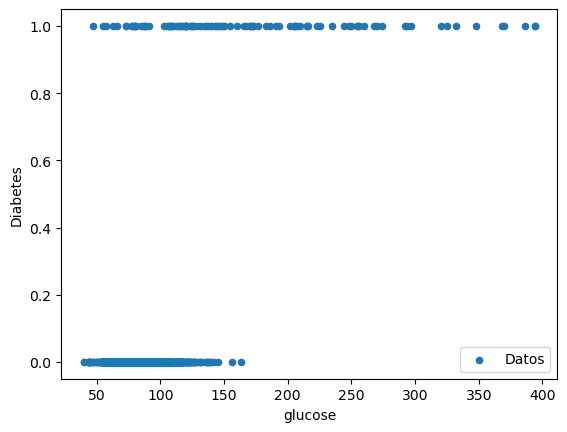

In [5]:
#Ahora realizaremos un grafico de dispersión para tener una idea principal

data.plot.scatter(x="glucose", y="diabetes", label="Datos")
plt.xlabel('glucose')
plt.ylabel('Diabetes')
plt.show()

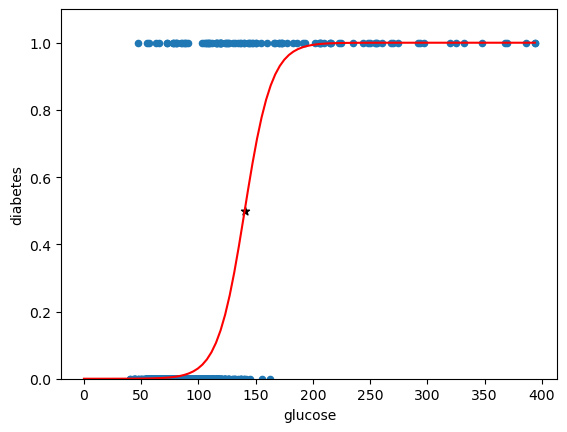

In [6]:
#Realizamos la grafica de regresión logística 

# puntos de la recta
x = np.linspace(0,data['glucose'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
data.plot.scatter(x='glucose',y='diabetes')
plt.plot(x, y, '-r') 
plt.scatter(corte_x, corte_y, color='black', marker='*')
plt.ylim(0,data['diabetes'].max()*1.1)
plt.show()

In [7]:
# Ahora escogemos un valor de "glucose" para el cual queremos calcular la probabilidad
valor_glucose = 160

# Calculamos la probabilidad
probabilidad = 1 / (1 + np.exp(-(w * valor_glucose + b)))

print(f"Para glucose={valor_glucose}, la probabilidad de diabetes es: {probabilidad:.2f}")

Para glucose=160, la probabilidad de diabetes es: 0.84


## Conclusiones

1. Como primera conclusión a partir de la gráfica de regresión logística realizada para el ejercicio, podemos entender que existe una relación entre el nivel de glucosa y las personas con diabetes, es decir, que, a mayor nivel de glucosa existe una probabilidad mayor de sufrir de diabetes.

2. Por otro lado, debemos entender que este modelo no es del todo confiable, ya que como podemos apreciar en la grafica existen valores de personas que sufren de diabetes, pero tienen una glucosa menor a 150. Es por eso por lo que, aunque este modelo puede darnos una idea, debemos tener cuidado a la hora de realizar afirmaciones a partir de él.

3. Por último, gracias al modelo realizado podemos indicar un valor para la glucosa y el nos brinda una probabilidad de tener diabetes. En el ejemplo le decimos que a partir de un valor de glucosa de 160 cual es la probabilidad de tener diabetes y el resultado es de un 84%.